## Notebook start

### Load Packages

In [21]:
import pandas as pd

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Column Names

In [23]:
excel_file = pd.ExcelFile('MMCR Data Stats Class.xlsx')

# Print the list of sheet names
excel_file.sheet_names

['1999 to 2018',
 'Primary OU',
 'Primary excluding',
 'Tarsus DBR',
 'Control vs Tarsus',
 'Tarsectomy',
 'Same patient ']

### Read Datasets

In [24]:
patient_info = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="1999 to 2018")
primary_ou = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Primary OU")
primary_excluding = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Primary excluding")
tarsus_dbr = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Tarsus DBR")
control_tarsus = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Control vs Tarsus")
tarsectomy = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Tarsectomy")
same_patient = pd.read_excel("MMCR Data Stats Class.xlsx", sheet_name="Same patient ")

In [25]:
patient_info.columns

Index(['#', 'Patient_name',
       'Original Dataset \nAll = 1999-2018\nRAG = 2013-2020\nDBR = 2021-2024',
       'Home_address', 'City', 'State', 'Zip', 'Phone', 'MRN', 'Eye ID', 'DOB',
       'Previous Surgery? (yes =1, No = 0)', 'Previous surgery type?',
       'Servoy photos on PPT?', 'Previous bleph? (yes =1, No = 0)',
       'Prevous bleph Upper lid? (yes =1, No = 0)',
       'Prevous bleph Lower lid? (yes =1, No = 0)', 'Previous Ptosis?',
       'Previous Cataract sx?', 'Previous Strabismus sx?',
       'Previous Lower Lid Ectropion?', 'Previous Entropion?',
       'Previous glaucoma sx?',
       'Previous Lateral canthal resuspension/tarsal strip sx?',
       'Surgery type on SX date', 'MMCR (0), ELR (1)',
       'Ptosis on sx date? (0 for no,  1 for yes)', 'Bleph on sx date?',
       'Upper lid belph on sx date?', 'Lower lid bleph on sx date?',
       'Lower Ectropion on sx date?',
       'Lateral canthoplasty/canthopexy/tarsal strip/canthal resuspension',
       'Upper Lid En

In [26]:
patient_info.shape[0]

682

### Merge 1999_to_2018 with Primary OU Dataset

In [27]:
patient_info.head()

,#,Patient_name,Original Dataset \nAll = 1999-2018\nRAG = 2013-2020\nDBR = 2021-2024,Home_address,City,State,Zip,Phone,MRN,Eye ID,DOB,"Previous Surgery? (yes =1, No = 0)",Previous surgery type?,Servoy photos on PPT?,"Previous bleph? (yes =1, No = 0)","Prevous bleph Upper lid? (yes =1, No = 0)","Prevous bleph Lower lid? (yes =1, No = 0)",Previous Ptosis?,Previous Cataract sx?,Previous Strabismus sx?,Previous Lower Lid Ectropion?,Previous Entropion?,Previous glaucoma sx?,Previous Lateral canthal resuspension/tarsal strip sx?,Surgery type on SX date,"MMCR (0), ELR (1)","Ptosis on sx date? (0 for no, 1 for yes)",Bleph on sx date?,Upper lid belph on sx date?,Lower lid bleph on sx date?,Lower Ectropion on sx date?,Lateral canthoplasty/canthopexy/tarsal strip/canthal resuspension,Upper Lid Entropion on sx date?,"Post MMCR Surgery- (yes = 1, no = 0)",Surgery after sx date of interest,Post MMCR Surgery- ptosis?,Ocular HX,AL Length (anterior lamella length),Crease,Levator function,"Gender (Male = 1, Female = 2)",Age,"Include (1=yes, 2=no, 3=maybe)","Ocular Dominance measured (0 = no, 1 = yes)","Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Sx Date,early postop date,Most recent Post Op Photo Date,Length of follow up (mo),Neo Eye,"Neo Eye Numeric (OD=0, OS=1, OU=2, null=3)",Preop_MRD1,Preop pupil to Brow,Neo Preop MRD1,Neo Preop Pupil to Brow,datys early postop,Early postop MRD,Early postop pupil to brow,Most recent Post Op MRD1,Most recent Post Op Pupil to Brow,"Dominant eye (OD=0,OS=1)",Notes,pre-op to short postop (SHpost - pre),Short postop to long postop (LOpost - SHpost),MRD Change with neo,Brow Change with neo,Total change with neo,Change in MRD (post-pre),Change in pupil to brow (post-pre),Total change with surgery,"Dominant eye is neo eye (yes =1, no =0","Neo eye (yes =1, no =0)",MRD difference from other eye at most recent postop (eye - opposite),MRD difference from other eye at pre-op (eye - opposite),MRD difference with neo,symmetry pre-op,Neo response less than 0.5mm,Any other surgery on date of MMCR (y=1),"Latrality bilateral=1, unilateral =0",Neo symmetry pre-op,"Have data (1), not (0)",Success (postop MRD >2.5mm),Success 2 (change in MRD of > 1mm),Success 3 (MRD difference < 1mm),Success 4 (success1 or 3),Ratio (resection to elevation),predicted MRD change - actual MRD change,"predicted within 1 of actual (0), >1 (1)",severe,bleph
0,681,"AGRAMA, FRANK",2013-2020,NaN,NaN,NaN,NaN,NaN,025-78-97 9,"AGRAMA, FRANK_0",1930-01-01,1.0,bilateral lower bleph,NaN,1,0.0,1.0,1,1,0,0,1,0,0,"OU eyebrow elevation direct approach, OU upper...",0,1,0,0.0,0.0,0,0,1,0.0,"10/29/2014, cataract extraction and intraocula...",NaN,NaN,NaN,NaN,14,1.0,66.432877,NaN,NaN,NaN,NaN,6.0,0,1997-05-09,NaT,2014-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 prev BULB,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,943,"GAURI, INDIRA",2021-2024,NaN,NaN,NaN,NaN,NaN,1203647,NaN,1943-04-16,1.0,CEIOL OU,NaN,0,0.0,0.0,0,0,0,0,0,0,0,2021-04-23 00:00:00,MMCR,1,0,0.0,0.0,0,0,0,1.0,BULB 12/3/2021,0.0,"CEIOL OU, Type 2 mac tel",NaN,NaN,15,2.0,NaN,NaN,NaN,NaN,NaN,7.0,0,2021-04-23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,679,"ABISHOR, JANET",2013-2020,NaN,NaN,NaN,NaN,NaN,5236956,"ABISHOR, JANET_00",1949-09-06,1.0,Lasik OU,NaN,0,0.0,0.0,0,0,0,0,0,0,0,OU MMCR,0,1,0,0.0,0.0,0,0,0,0.0,0,NaN,LASIK,NaN,NaN,NaN,2.0,67.019178,NaN,NaN,0.0,NaN,9.0,0,2017-08-18,NaT,2017-11-30 00:00:00,NaN,OD,0.0,0.54,NaN,1.77,NaN,NaN,NaN,NaN,2.03,NaN,NaN,NaN,NaN,NaN,1.23,NaN,NaN,1.49,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,682,"AKERS, MARI-ANNE S",2013-2020,NaN,NaN,NaN,NaN,NaN,030-28-18,"AKERS, MARI-ANNE S_00",1938-03-03,1.0,pterygium excision

##### Clean Primary OU Dataset

In [28]:
# NaN Rows
primary_ou[511:518]

,#,Unnamed: 1,Surgery type on SX date,"MMCR (0), ELR (1)","Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus
511,558.0,NaN,OD upper lid ptosis sx posterior,0.0,1.0,63.594521,1.0,NaN,7.0,0.0,NaN,1.132,1.20,0.068,yes,NaN,NaN
512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,1.0,NaN,Ou upper lid ptosis posterior approach,0.0,1.0,71.673973,0.0,1.0,8.0,1.0,2.966667,0.000,2.92,2.920,NaN,yes,NaN


In [29]:
# Remove NaN Rows
primary_ou.drop(range(512, 517), inplace=True)
primary_ou.reset_index(drop=True, inplace=True)
primary_ou[510:520]

,#,Unnamed: 1,Surgery type on SX date,"MMCR (0), ELR (1)","Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus
510,557.0,NaN,OS upper lid ptosis posterior,0.0,2.0,73.476712,1.0,1.0,6.0,0.0,4.233333,1.000,1.68,0.680,yes,NaN,NaN
511,558.0,NaN,OD upper lid ptosis sx posterior,0.0,1.0,63.594521,1.0,NaN,7.0,0.0,NaN,1.132,1.20,0.068,yes,NaN,NaN
512,1.0,NaN,Ou upper lid ptosis posterior approach,0.0,1.0,71.673973,0.0,1.0,8.0,1.0,2.966667,0.000,2.92,2.920,NaN,yes,NaN
513,15.0,NaN,"OU upper lid ptosis posterior, OU ectropion, O...",0.0,2.0,74.991781,0.0,1.0,8.0,1.0,3.133333,1.090,3.90,2.810,NaN,NaN,NaN
514,16.0,NaN,"OU upper lid ptosis posterior, OU ectropion, O...",0.0,2.0,73.706849,1.0,1.0,8.0,1.5,6.333333,1.056,4.15,3.094,NaN,NaN,yes
515,18.0,NaN,OU upper lid ptosis internal,0.0,2.0,79.164384,1.0,1.0,7.5,1.5,6.333333,0.000,1.57,1.570,NaN,yes,NaN
516,21.0,NaN,OU upper lid ptosis posterior,0.0,1.0,76.347945,0.0,1.0,8.0,1.0,4.233333,1.840,3.18,1.340,NaN,NaN,yes
517,22.0,NaN,"OU upper lid ptosis posterior, OS upper lid pi...",0.0,1.0,76.347945,1.0,1.0,8.0,1.0,4.233333,2.040,2.44,0.400,NaN,NaN,NaN
518,78.0,NaN,"OU internal levator resection, OU upper lid bleph",0.0,2.0,52.564384,0.0,1.0,8.0,0.5,1.700000,0.000,2.04,2.040,NaN,NaN,yes
519,79.0,NaN,"OU internal levator resection, OU upper lid bleph",0.0,2.0,52.564384,1.0,1.0,7.5,0.5,136.766667,0.000,1.68,1.680,NaN,NaN,NaN


In [30]:
# Change Column '#' values from '1.0' to '1'
primary_ou['#'] = primary_ou['#'].astype(int)

##### Merge 1999 to 2018 with Primary OU

In [31]:
primary_ou.columns

Index(['#', 'Unnamed: 1', 'Surgery type on SX date', 'MMCR (0), ELR (1)',
       'Gender (Male = 1, Female = 2)', 'Age', 'Eye (OD=0, OS=1)',
       'Surgical eye (yes=1, no =0)', 'Tissue Resected (mm)',
       'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
       'Length of follow up (mo)', 'Preop_MRD1', 'Most recent Post Op MRD1',
       'Change in MRD (post-pre)', 'Unilateral', '1 eye tarsus+ 1 eye normal',
       'Both eyes tarsus'],
      dtype='object')

In [32]:
# Excluded 'Unamed: 1'
primary_ou_columns = ['#', 'Surgery type on SX date', 'MMCR (0), ELR (1)',
       'Gender (Male = 1, Female = 2)', 'Age', 'Eye (OD=0, OS=1)',
       'Surgical eye (yes=1, no =0)', 'Tissue Resected (mm)',
       'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
       'Length of follow up (mo)', 'Preop_MRD1', 'Most recent Post Op MRD1',
       'Change in MRD (post-pre)', 'Unilateral', '1 eye tarsus+ 1 eye normal',
       'Both eyes tarsus']

In [33]:
patient_info.columns

Index(['#', 'Patient_name',
       'Original Dataset \nAll = 1999-2018\nRAG = 2013-2020\nDBR = 2021-2024',
       'Home_address', 'City', 'State', 'Zip', 'Phone', 'MRN', 'Eye ID', 'DOB',
       'Previous Surgery? (yes =1, No = 0)', 'Previous surgery type?',
       'Servoy photos on PPT?', 'Previous bleph? (yes =1, No = 0)',
       'Prevous bleph Upper lid? (yes =1, No = 0)',
       'Prevous bleph Lower lid? (yes =1, No = 0)', 'Previous Ptosis?',
       'Previous Cataract sx?', 'Previous Strabismus sx?',
       'Previous Lower Lid Ectropion?', 'Previous Entropion?',
       'Previous glaucoma sx?',
       'Previous Lateral canthal resuspension/tarsal strip sx?',
       'Surgery type on SX date', 'MMCR (0), ELR (1)',
       'Ptosis on sx date? (0 for no,  1 for yes)', 'Bleph on sx date?',
       'Upper lid belph on sx date?', 'Lower lid bleph on sx date?',
       'Lower Ectropion on sx date?',
       'Lateral canthoplasty/canthopexy/tarsal strip/canthal resuspension',
       'Upper Lid En

In [34]:
# Excluded Columns From '1999 to 2018' Dataset
# 'Original Dataset \nAll = 1999-2018\nRAG = 2013-2020\nDBR = 2021-2024'
# 'Home_address'
# 'City'
# 'State'
# 'Zip'
# 'Phone'
# 'MRN'
# 'DOB'
# 'Surgery type on SX date'
# 'MMCR (0), ELR (1)'
# 'Gender (Male = 1, Female = 2)'
# 'Age'
# 'Surgical eye (yes=1, no =0)'
# 'Tissue Resected (mm)'
# 'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed'
# 'Length of follow up (mo)'
# 'Preop_MRD1'
# 'Early postop pupil to brow'
# 'Most recent Post Op MRD1'
# 'Change in MRD (post-pre)'
# 'bleph'

# Set patient_info Columns
patient_info_columns = ['#', 'Patient_name', 'Eye ID', 'Previous Surgery? (yes =1, No = 0)', 'Previous surgery type?',
                        'Previous bleph? (yes =1, No = 0)',
                        'Prevous bleph Upper lid? (yes =1, No = 0)',
                        'Prevous bleph Lower lid? (yes =1, No = 0)', 'Previous Ptosis?',
                        'Previous Cataract sx?', 'Previous Strabismus sx?',
                        'Previous Lower Lid Ectropion?', 'Previous Entropion?',
                        'Previous glaucoma sx?',
                        'Previous Lateral canthal resuspension/tarsal strip sx?',
                        'Ptosis on sx date? (0 for no,  1 for yes)', 'Bleph on sx date?',
                        'Upper lid belph on sx date?', 'Lower lid bleph on sx date?',
                        'Lower Ectropion on sx date?',
                        'Lateral canthoplasty/canthopexy/tarsal strip/canthal resuspension',
                        'Upper Lid Entropion on sx date?',
                        'Post MMCR Surgery- (yes = 1, no = 0)',
                        'Surgery after sx date of interest', 'Post MMCR Surgery- ptosis?',
                        'Ocular HX', 'AL Length (anterior lamella length)', 'Crease',
                        'Levator function', 'Include (1=yes, 2=no, 3=maybe)',
                        'Ocular Dominance measured (0 = no, 1 = yes)', 
                        'Sx Date', 'early postop date ', 'Most recent Post Op Photo Date', 'Neo Eye',
                        'Neo Eye Numeric (OD=0, OS=1, OU=2, null=3)', 'Preop pupil to Brow', 'Neo Preop MRD1', 'Neo Preop Pupil to Brow',
                        'datys early postop', 'Early postop MRD', 'Early postop pupil to brow ', 'Most recent Post Op Pupil to Brow',
                        'Dominant eye (OD=0,OS=1)', 'Notes',
                        'pre-op to short postop (SHpost - pre)',
                        'Short postop to long postop (LOpost - SHpost)', 'MRD Change with neo',
                        'Brow Change with neo', 'Total change with neo', 'Change in pupil to brow (post-pre)',
                        'Total change with surgery', 'Dominant eye is neo eye (yes =1, no =0',
                        'Neo eye (yes =1, no =0)',
                        'MRD difference from other eye at most recent postop (eye - opposite)',
                        'MRD difference from other eye at pre-op (eye - opposite)',
                        'MRD difference with neo', 'symmetry pre-op',
                        'Neo response less than 0.5mm',
                        'Any other surgery on date of MMCR (y=1)',
                        'Latrality bilateral=1, unilateral =0', 'Neo symmetry pre-op',
                        'Have data (1), not (0)', 'Success (postop MRD >2.5mm)',
                        'Success 2 (change in MRD of > 1mm)',
                        'Success 3 (MRD difference < 1mm)', 'Success 4 (success1 or 3)',
                        'Ratio (resection to elevation)',
                        'predicted MRD change - actual MRD change',
                        'predicted within 1 of actual (0), >1 (1)', 'severe', 'bleph'] # Still need to add more columns

In [35]:
merged_df = patient_info[patient_info_columns].merge(primary_ou[primary_ou_columns], on='#', how='right')

In [36]:
merged_df.head()

,#,Patient_name,Eye ID,"Previous Surgery? (yes =1, No = 0)",Previous surgery type?,"Previous bleph? (yes =1, No = 0)","Prevous bleph Upper lid? (yes =1, No = 0)","Prevous bleph Lower lid? (yes =1, No = 0)",Previous Ptosis?,Previous Cataract sx?,Previous Strabismus sx?,Previous Lower Lid Ectropion?,Previous Entropion?,Previous glaucoma sx?,Previous Lateral canthal resuspension/tarsal strip sx?,"Ptosis on sx date? (0 for no, 1 for yes)",Bleph on sx date?,Upper lid belph on sx date?,Lower lid bleph on sx date?,Lower Ectropion on sx date?,Lateral canthoplasty/canthopexy/tarsal strip/canthal resuspension,Upper Lid Entropion on sx date?,"Post MMCR Surgery- (yes = 1, no = 0)",Surgery after sx date of interest,Post MMCR Surgery- ptosis?,Ocular HX,AL Length (anterior lamella length),Crease,Levator function,"Include (1=yes, 2=no, 3=maybe)","Ocular Dominance measured (0 = no, 1 = yes)",Sx Date,early postop date,Most recent Post Op Photo Date,Neo Eye,"Neo Eye Numeric (OD=0, OS=1, OU=2, null=3)",Preop pupil to Brow,Neo Preop MRD1,Neo Preop Pupil to Brow,datys early postop,Early postop MRD,Early postop pupil to brow,Most recent Post Op Pupil to Brow,"Dominant eye (OD=0,OS=1)",Notes,pre-op to short postop (SHpost - pre),Short postop to long postop (LOpost - SHpost),MRD Change with neo,Brow Change with neo,Total change with neo,Change in pupil to brow (post-pre),Total change with surgery,"Dominant eye is neo eye (yes =1, no =0","Neo eye (yes =1, no =0)",MRD difference from other eye at most recent postop (eye - opposite),MRD difference from other eye at pre-op (eye - opposite),MRD difference with neo,symmetry pre-op,Neo response less than 0.5mm,Any other surgery on date of MMCR (y=1),"Latrality bilateral=1, unilateral =0",Neo symmetry pre-op,"Have data (1), not (0)",Success (postop MRD >2.5mm),Success 2 (change in MRD of > 1mm),Success 3 (MRD difference < 1mm),Success 4 (success1 or 3),Ratio (resection to elevation),predicted MRD change - actual MRD change,"predicted within 1 of actual (0), >1 (1)",severe,bleph,Surgery type on SX date,"MMCR (0), ELR (1)","Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus
0,2,Aaron Greenberg,Aaron Greenberg_1,0.0,NaN,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0.0,NaN,0.0,Ocular Migraine,NaN,NaN,15,1.0,NaN,2004-01-16,2004-01-22,2004-04-15 00:00:00,OD,0.0,19.07,0.98,16.82,6.0,1.66,NaN,19.01,NaN,1mm tarsectomy on R side,0.660,1.00,-0.020,-2.25,-2.230,-0.06,-1.720,NaN,0.0,-0.26,1.000,-0.24,1.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,4.518072,0.215,0.0,NaN,NaN,Ou upper lid ptosis posterior approach,0.0,1.0,71.673973,1.0,1.0,7.5,0.0,2.966667,1.000,2.66,1.660,NaN,yes,NaN
1,3,Abby Hellwarth,Abby Hellwarth_0,1.0,cataract OU. PC IOL,0,0.0,0.0,0,1,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0.0,NaN,0.0,Glaucoma,NaN,NaN,14,1.0,NaN,2010-04-21,2010-04-28,2010-07-09 00:00:00,OD,0.0,17.17,2.04,9.36,7.0,2.92,NaN,9.96,NaN,NaN,1.841,-0.08,0.961,-7.81,-8.771,-7.21,-8.971,NaN,1.0,-0.23,1.079,1.41,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,5.110733,0.489,0.0,NaN,NaN,OU Levator repair internal approach,0.0,2.0,76.715068,0.0,1.0,9.0,0.0,2.600000,1.079,2.84,1.761,NaN,NaN,NaN
2,4,Abby Hellwarth,Abby Hellwarth_1,1.0,cataract OU. PC IOL,0,0.0,0.0,0,1,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0.0,NaN,0.0,Glaucoma,NaN,NaN,15,1.0,NaN,2010-04-21,2010-04-28,2010-07-09 00:00:00,OD,0.0,19.19,0.63,12.39,7.0,2.86,NaN,13.65,NaN,NaN,2.860,0.21,0.630,-6.80,-7.430,-5.54,-8.610,NaN,0.0,0.23,-1.079,-1.41,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.931596,-0.820,0.0,1.0,NaN,OU Levator repair internal approach,0.0,2.0,76.715068,1.0,1.0,9.0,0.0,2.600000,0.000,3.07,3.070,NaN,NaN,NaN
3,5,Akram Hannani,Akram Hannani_0,0.0,NaN,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0.0,NaN,0.0,NaN,22,NaN,15,1.0,NaN,2002-10-30,2002-11-04,2003-12-04 00:00:00

## NEW Dataset (Preliminary Cleaned by Andre)

#### Load Packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# View All Columns Option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read NEW.csv Dataset (Made by Andre)

In [50]:
new_data = pd.read_csv('NEW.csv')

In [51]:
new_data.tail()

,Dataset,Patient_name,#,Surgery type on SX date,"MMCR (0), ELR (1)","Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),Tarsus resected (Yes/No),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus,Other surgeries at the same time,OD/OS,Sx Date
154,DBR,"Price, Willie",7081630,OD MMCR +1,0.0,1.0,72.451745,NaN,NaN,7.0,Y,NaN,NaN,-2.337,1.734,4.071,NaN,NaN,NaN,NaN,OD,2023-12-06
155,DBR,"Salazar, Juan C",7093113,OU MMCR + 1,0.0,1.0,79.071869,NaN,NaN,7.0,Y,NaN,NaN,-0.224,4.032,4.256,NaN,NaN,NaN,NaN,OD,2024-06-26
156,All,Aaron Greenberg,2,Ou upper lid ptosis posterior approach,NaN,1.0,71.670000,1.0,NaN,7.5,0,NaN,NaN,1.000,2.660,1.660,NaN,yes,NaN,NaN,NaN,NaN
157,All,Barbara Einziger,17,OU upper lid ptosis internal,NaN,2.0,79.160000,0.0,NaN,5.0,0,NaN,NaN,0.000,1.710,1.710,NaN,yes,NaN,NaN,NaN,NaN
158,All,Joella West,87,OU ptosis posterior,NaN,2.0,61.240000,1.0,NaN,8.0,0,NaN,NaN,2.400,3.380,0.980,NaN,yes,NaN,NaN,NaN,NaN


### Clean OD/OS Column

In [53]:
def od_os_classification(boolean, categorical):
    if pd.notna(boolean):
        if boolean == 1:
            return 'OS'
        elif boolean == 0:
            return 'OD'
    if pd.notna(categorical):
        if categorical == 'OS':
            return 'OS'
        elif categorical == 'OD':
            return 'OD'
    
new_data['OD/OS'] = new_data.apply(lambda x: od_os_classification(x['Eye (OD=0, OS=1)'], x['OD/OS']), axis=1)

In [56]:
new_data[['Eye (OD=0, OS=1)', 'OD/OS']].tail(10)

,"Eye (OD=0, OS=1)",OD/OS
149,NaN,OD
150,NaN,OD
151,NaN,OS
152,NaN,OD
153,NaN,OS
154,NaN,OD
155,NaN,OD
156,1.0,OS
157,0.0,OD
158,1.0,OS


### Output CSV

In [61]:
new_data.head()

,Dataset,Patient_name,#,Surgery type on SX date,"MMCR (0), ELR (1)","Gender (Male = 1, Female = 2)",Age,"Eye (OD=0, OS=1)","Surgical eye (yes=1, no =0)",Tissue Resected (mm),Tarsus resected (Yes/No),"Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)",Length of follow up (mo),Preop_MRD1,Most recent Post Op MRD1,Change in MRD (post-pre),Unilateral,1 eye tarsus+ 1 eye normal,Both eyes tarsus,Other surgeries at the same time,OD/OS,Sx Date
0,All,Aaron Greenberg,1,Ou upper lid ptosis posterior approach,0.0,1.0,71.673973,0.0,1.0,8.0,Y,1.0,2.966667,0.000,2.92,2.920,NaN,yes,NaN,NaN,OD,NaN
1,All,Abby Hellwarth,3,OU Levator repair internal approach,0.0,2.0,76.715068,0.0,1.0,9.0,N,0.0,2.600000,1.079,2.84,1.761,NaN,NaN,NaN,NaN,OD,NaN
2,All,Akram Hannani,6,OU upper lid ptosis,0.0,2.0,71.260274,1.0,1.0,5.5,N,0.0,13.133333,0.690,1.25,0.560,NaN,NaN,NaN,NaN,OS,NaN
3,All,Arleen Richman,10,OU upper lid ptosis,0.0,2.0,65.443836,1.0,1.0,6.5,N,0.0,3.000000,0.820,1.05,0.230,NaN,NaN,NaN,NaN,OS,NaN
4,All,Barbara Einziger,18,OU upper lid ptosis internal,0.0,2.0,79.164384,1.0,1.0,7.5,Y,1.5,6.333333,0.000,1.57,1.570,NaN,yes,NaN,NaN,OS,NaN


In [ ]:
new_data.to_csv('new_updated.csv')

### Create Model 

In [69]:
# Step 1: Load the data
df = new_data

# Step 2: Select and clean relevant columns
df['Tarsus_Resected'] = pd.to_numeric(
    df['Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)'],
    errors='coerce'
)
df['PostOp_MRD1'] = pd.to_numeric(
    df['Most recent Post Op MRD1'],
    errors='coerce'
)

# Drop missing values
model_data = df[['Tarsus_Resected', 'PostOp_MRD1']].dropna()

# Drop missing values
model_data = df[['Tarsus_Resected', 'PostOp_MRD1']].dropna()

# Step 3: Split into training and test sets
X = model_data[['Tarsus_Resected']]
y = model_data['PostOp_MRD1']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Model Coefficients:
Intercept: 2.8693489071038254
Slope: 0.31458196721311515
R² score: -0.02132028338989489
MSE: 1.9242790871506745


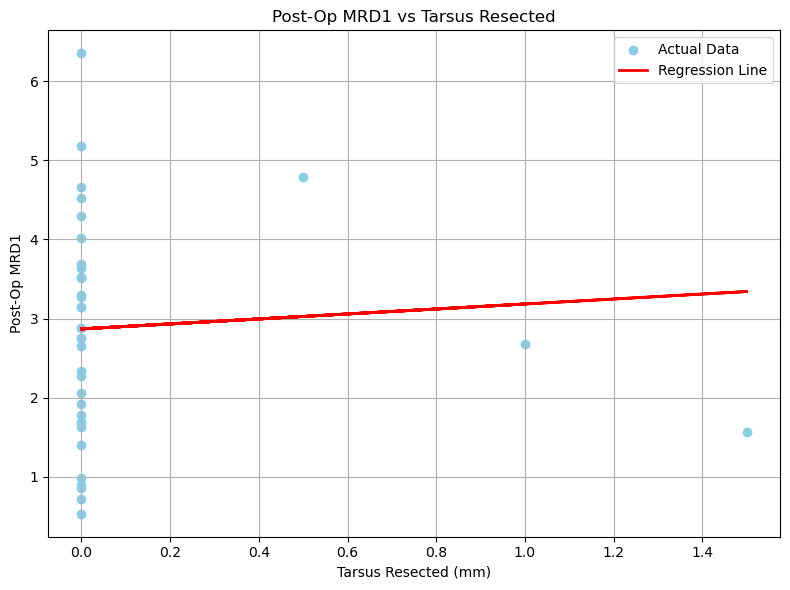

In [70]:
# Step 1: Load the data
df = new_data

# Step 2: Select and clean relevant columns
df['Tarsus_Resected'] = pd.to_numeric(
    df['Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)'],
    errors='coerce'
)
df['PostOp_MRD1'] = pd.to_numeric(
    df['Most recent Post Op MRD1'],
    errors='coerce'
)

# Drop missing values
model_data = df[['Tarsus_Resected', 'PostOp_MRD1']].dropna()

# Step 3: Split into training and test sets
X = model_data[['Tarsus_Resected']]
y = model_data['PostOp_MRD1']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Step 4: Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Print model results
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
print(f"R² score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# Step 6: Plot the regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Post-Op MRD1 vs Tarsus Resected')
plt.xlabel('Tarsus Resected (mm)')
plt.ylabel('Post-Op MRD1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error: 1.274896118102086
R² Score: 0.08406306049823675


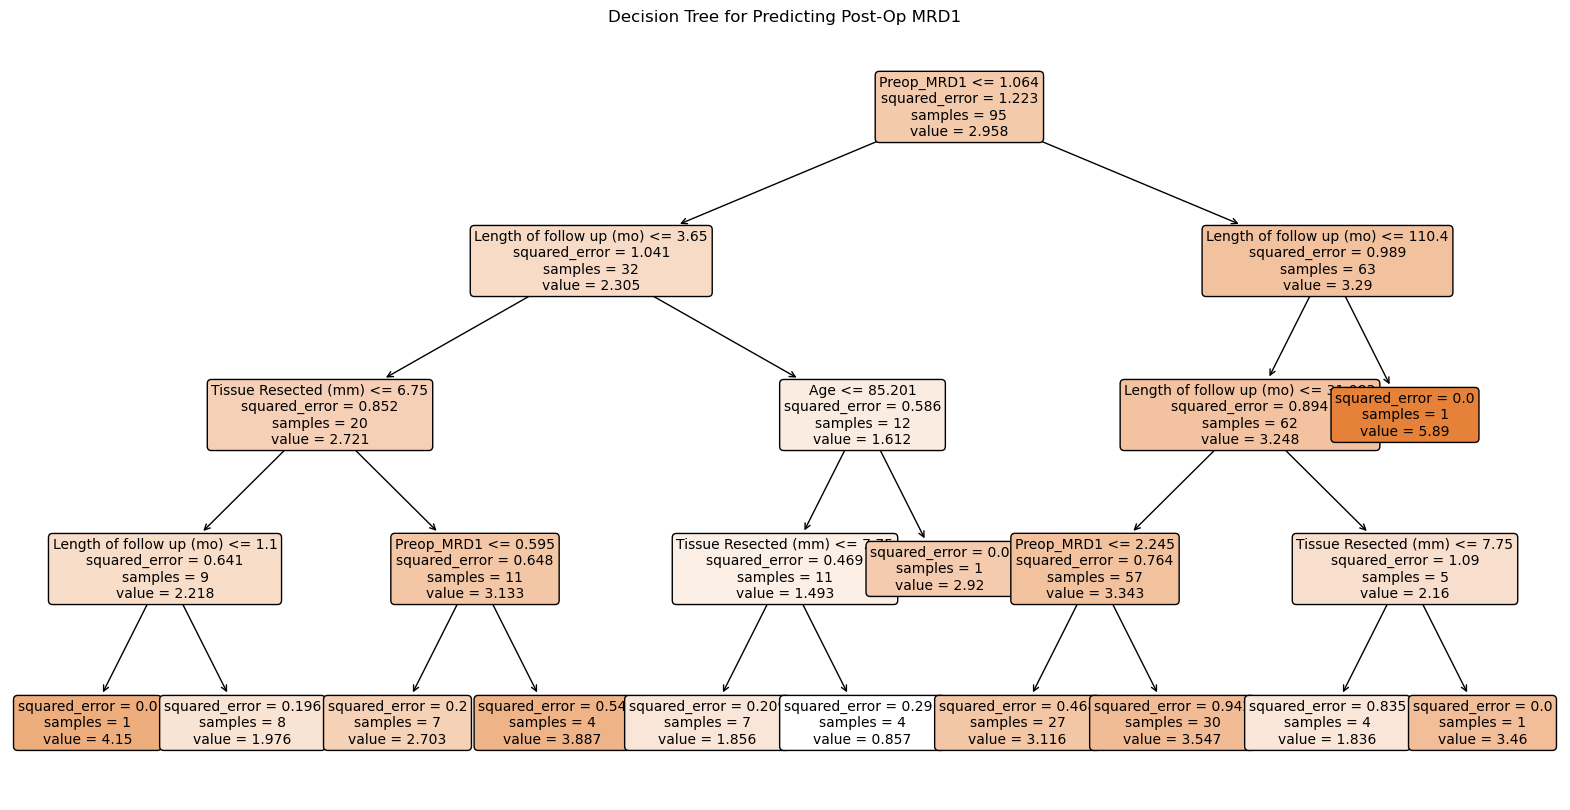

In [73]:
# Load your data
df = new_data  # Replace with your actual file path

# Select relevant numeric features and the target
features = [
    'MMCR (0), ELR (1)',
    'Gender (Male = 1, Female = 2)',
    'Age',
    'Eye (OD=0, OS=1)',
    'Surgical eye (yes=1, no =0)',
    'Tissue Resected (mm)',
    'Tarsus resected ( 0 for no tarsus, # for mm of tarsus removed)',
    'Length of follow up (mo)',
    'Preop_MRD1'
]
target = 'Most recent Post Op MRD1'

# Prepare the data
data = df[features + [target]].copy()
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
data = data.dropna()  # Drop rows with NA

# Split into X and y
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Post-Op MRD1")
plt.show()